In [ ]:
#Import Common library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mno

In [ ]:
df = pd.read_csv("/content/Framingham Dataset.csv")
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# PREPROCESSING

In [ ]:
df.shape

(11627, 39)

In [ ]:
# Persentase data yang hilang

pd.DataFrame({'Jumlah NA': df.isna().sum(), 'Persentase': (df.isna().sum()/len(df)*100)})

,Jumlah NA,Persentase
RANDID,0,0.000000
SEX,0,0.000000
TOTCHOL,409,3.517674
AGE,0,0.000000
SYSBP,0,0.000000
DIABP,0,0.000000
CURSMOKE,0,0.000000
CIGPDAY,79,0.679453
BMI,52,0.447235
DIABETES,0,0.000000


<Axes: >

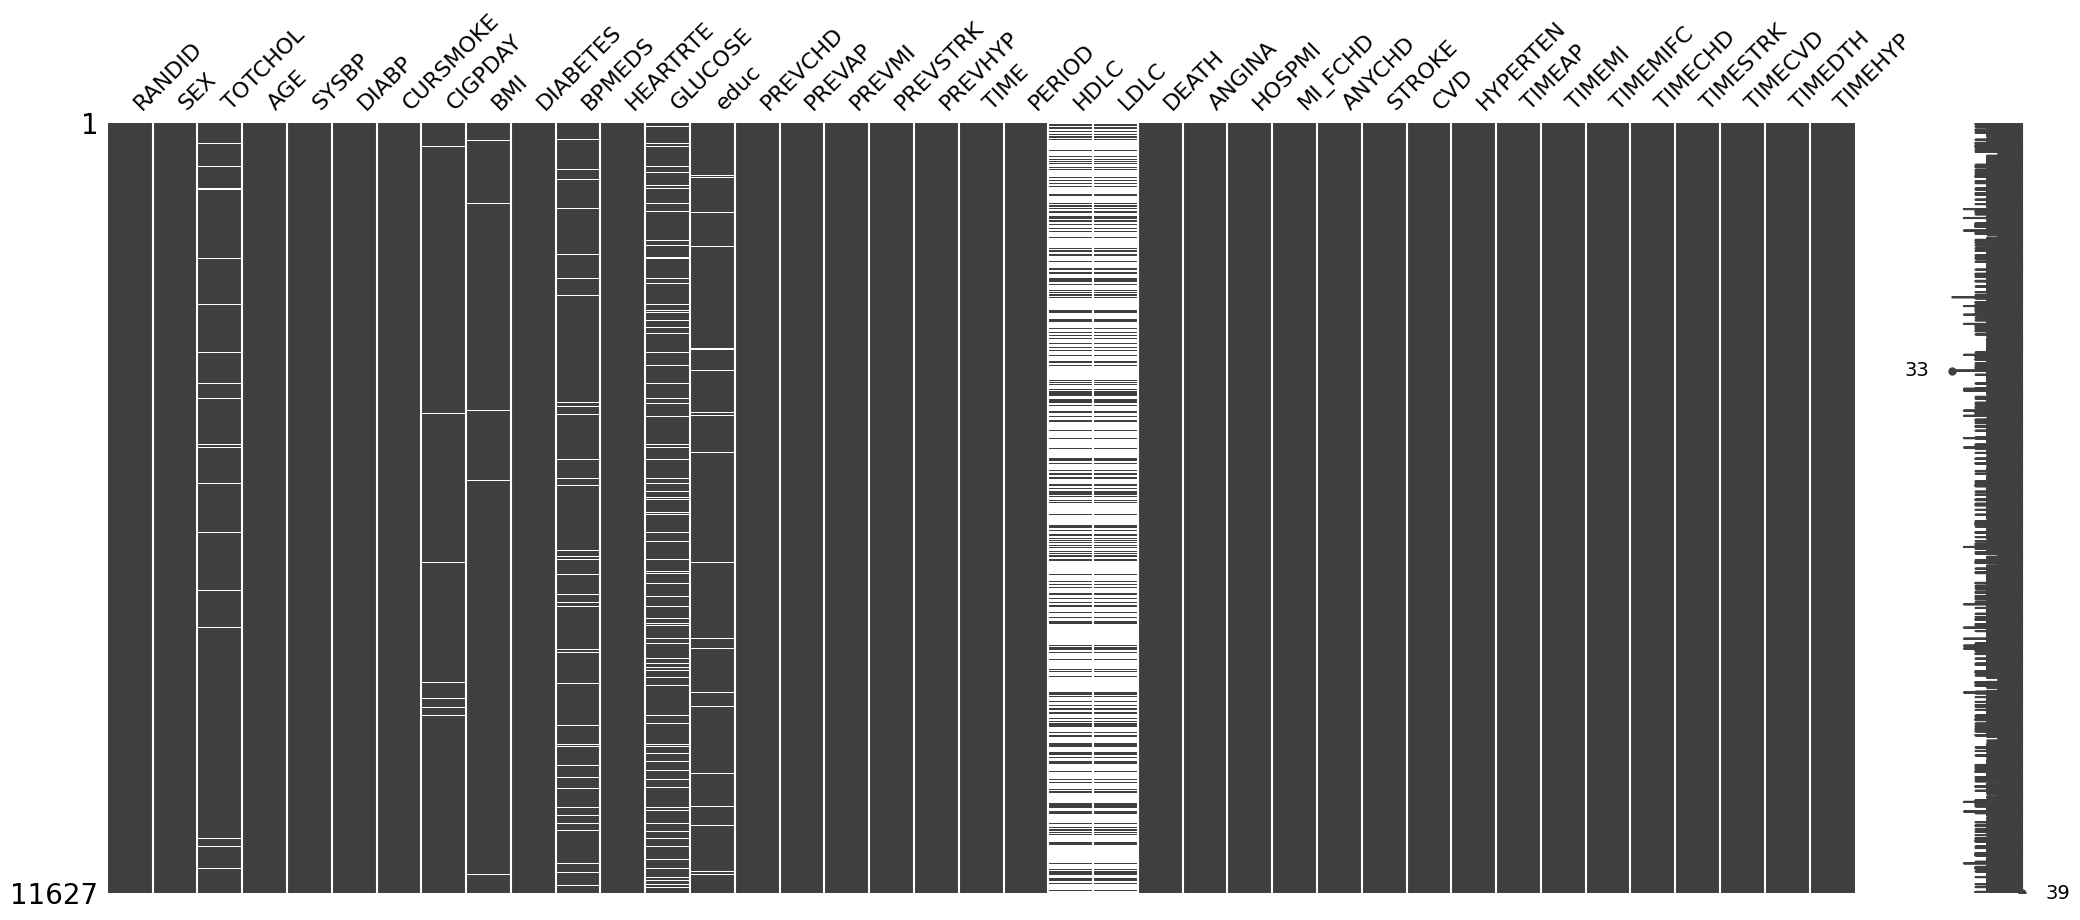

In [ ]:
mno.matrix(df)

In [ ]:
# DROP VARIABEL HDLC DAN LDLC
df = df.drop(['HDLC', 'LDLC'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

imputasi missing value

In [ ]:
from sklearn.impute import KNNImputer
# Create KNNImputer instance with 2 nearest neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Imputed Data:")
print(df_imputed)

Imputed Data:
          RANDID  SEX  TOTCHOL   AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY     BMI  \
0         2448.0  1.0    195.0  39.0  106.0   70.0       0.0      0.0  26.970   
1         2448.0  1.0    209.0  52.0  121.0   66.0       0.0      0.0  27.735   
2         6238.0  2.0    250.0  46.0  121.0   81.0       0.0      0.0  28.730   
3         6238.0  2.0    260.0  52.0  105.0   69.5       0.0      0.0  29.430   
4         6238.0  2.0    237.0  58.0  108.0   66.0       0.0      0.0  28.500   
...          ...  ...      ...   ...    ...    ...       ...      ...     ...   
11622  9998212.0  1.0    173.0  46.0  126.0   82.0       0.0      0.0  19.170   
11623  9998212.0  1.0    153.0  52.0  143.0   89.0       0.0      0.0  25.740   
11624  9999312.0  2.0    196.0  39.0  133.0   86.0       1.0     30.0  20.910   
11625  9999312.0  2.0    240.0  46.0  138.0   79.0       1.0     20.0  26.390   
11626  9999312.0  2.0    218.0  50.0  147.0   96.0       1.0     10.0  24.190   

       DIABET

In [ ]:
# Persentase data yang hilang

pd.DataFrame({'Jumlah NA': df_imputed.isna().sum(), 'Persentase': (df_imputed.isna().sum()/len(df)*100)})

,Jumlah NA,Persentase
RANDID,0,0.0
SEX,0,0.0
TOTCHOL,0,0.0
AGE,0,0.0
SYSBP,0,0.0
DIABP,0,0.0
CURSMOKE,0,0.0
CIGPDAY,0,0.0
BMI,0,0.0
DIABETES,0,0.0


In [ ]:
df_imputed.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.199708,54.792810,136.324116,83.037757,0.432528,8.245248,25.877172,0.045584,...,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.045317,9.564299,22.798625,11.660144,0.495448,12.177614,4.101801,0.208589,...,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.100000,0.000000,...,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.065000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [ ]:
# menghitung value count dari variabel target
df_imputed['DEATH'].value_counts()

,count
DEATH,
0.0,8100
1.0,3527


Hapus fitur RANDID

In [ ]:
# Hapus fitur RANDID
df_imputed = df_imputed.drop(['RANDID'], axis=1)

In [ ]:
X=df_imputed.drop(['DEATH'], axis=1)
y=df_imputed['DEATH']

# EDA

## KORELASI ANTAR VARIABEL

In [ ]:
corr_df = df_imputed.drop(["DEATH"], axis=1)
corr_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.735,0.0,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,2.0,260.0,52.0,105.0,69.5,0.0,0.0,29.430,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,2.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0


In [ ]:
cor = corr_df.corr(method='pearson')

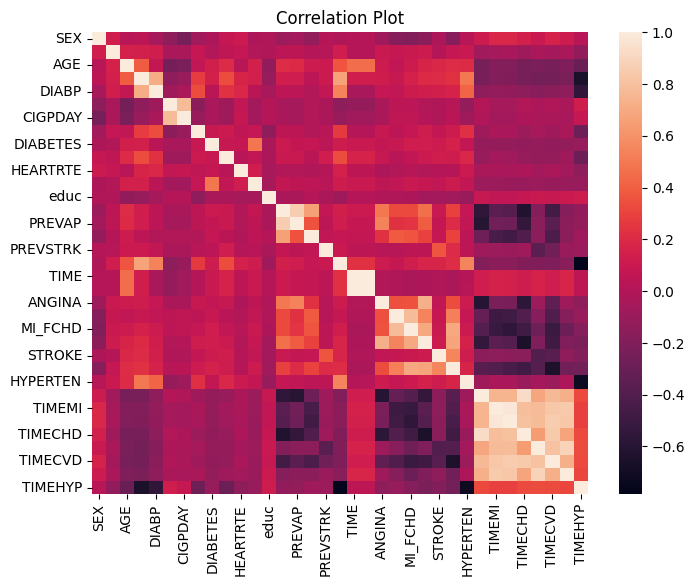

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sb.heatmap(cor)
plt.show()

In [ ]:
# hitung vif dari setiap variabel-variabel independen (X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_df.values, i) for i in range(corr_df.shape[1])]
vif["features"] = corr_df.columns
vif

,VIF Factor,features
0,13.351765,SEX
1,32.156408,TOTCHOL
2,63.231573,AGE
3,122.104563,SYSBP
4,128.652460,DIABP
5,4.626473,CURSMOKE
6,3.897351,CIGPDAY
7,48.682892,BMI
8,1.418313,DIABETES
9,1.317742,BPMEDS


## VISUALISASI DISTRIBUSI VARIABEL TARGET

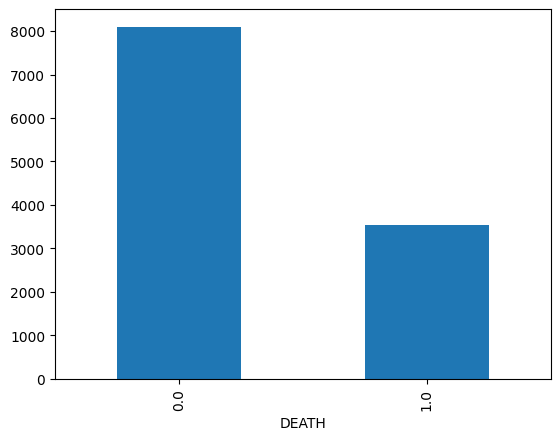

In [ ]:
# visualisasi bar chart variabel DEATH
df_imputed['DEATH'].value_counts().plot(kind='bar')
plt.show()

## VISUALISASI DISTRIBUSI VARIABEL INDEPENDEN (KATEGORIK)

<function matplotlib.pyplot.show(close=None, block=None)>

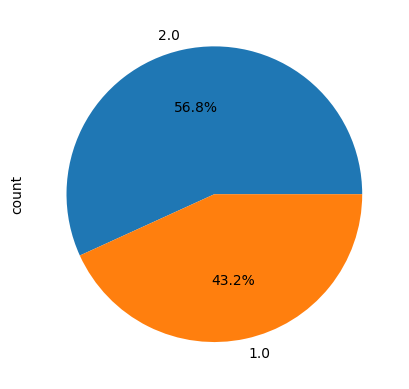

In [ ]:
# pie chart bagus variabel sex dengan label 1: male dan 2: female
df_imputed['SEX'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show

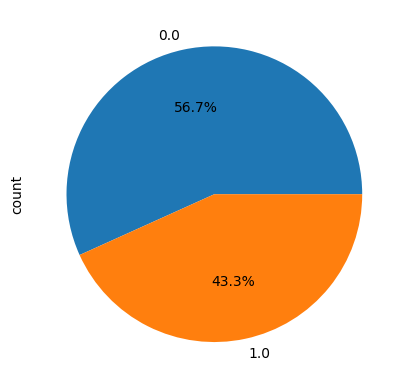

In [ ]:
# pie chart variabel CURSMOKE dengan label 1: male dan 2: female
df_imputed['CURSMOKE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

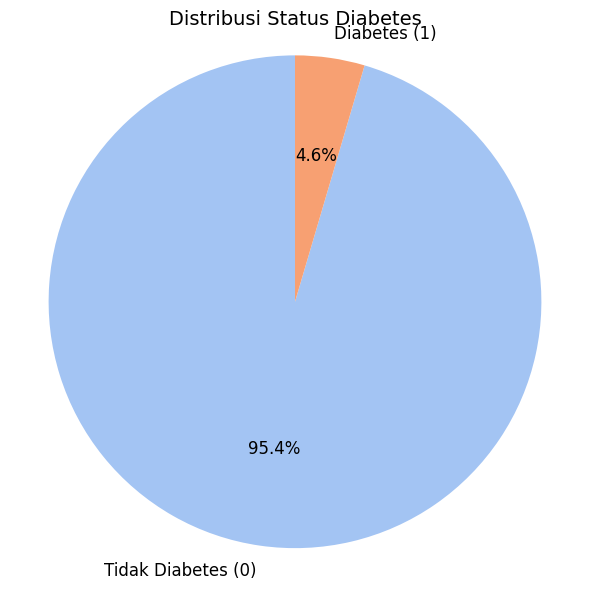

In [ ]:
import matplotlib.pyplot as plt

# Label dan warna baru
labels = ['Tidak Diabetes (0)', 'Diabetes (1)']
colors = ['#a3c4f3', '#f7a072']

# Hitung distribusi
diabetes_counts = df_imputed['DIABETES'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    diabetes_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Distribusi Status Diabetes', fontsize=14)
plt.axis('equal')  # Pie bulat
plt.tight_layout()
plt.show()


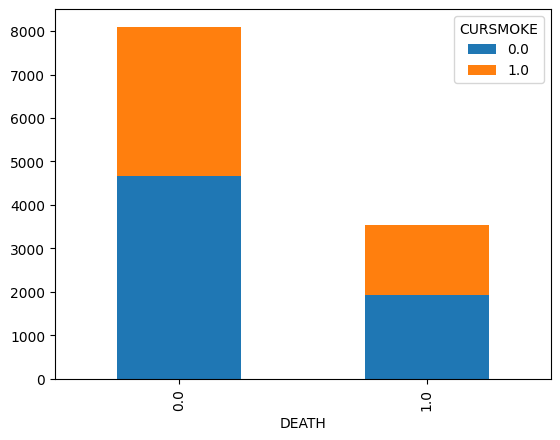

In [ ]:
df_imputed.groupby(['DEATH', 'CURSMOKE']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

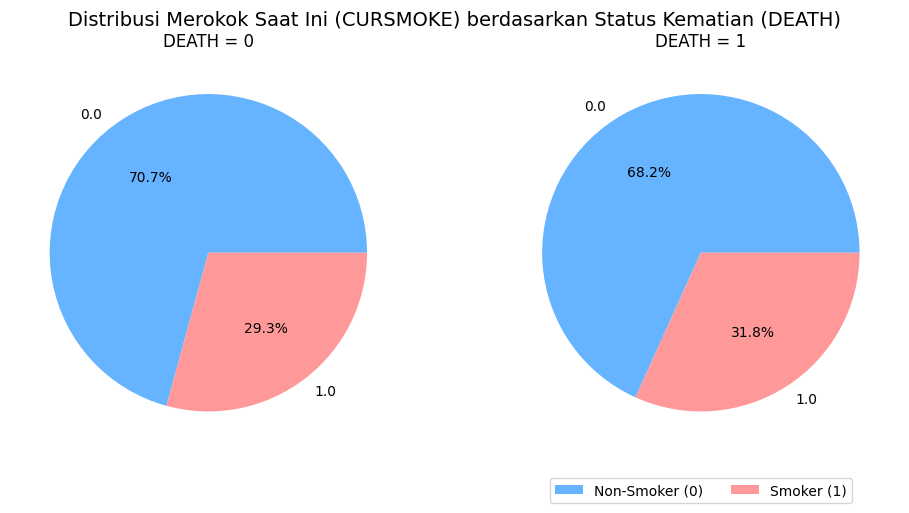

In [ ]:
import matplotlib.pyplot as plt

# Grouping dan plotting
ax = df_imputed.groupby(['DEATH', 'CURSMOKE']).size().unstack().plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 5),
    colors=['#66b3ff', '#ff9999'],
    legend=False
)

# Tambahkan judul untuk masing-masing subplot
for i, pie in enumerate(ax):
    pie.set_title(f'DEATH = {i}')
    pie.set_ylabel('')  # Hilangkan label y

# Tambahkan legenda
plt.legend(labels=['Non-Smoker (0)', 'Smoker (1)'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Tambahkan judul utama
plt.suptitle('Distribusi Merokok Saat Ini (CURSMOKE) berdasarkan Status Kematian (DEATH)', fontsize=14)

plt.tight_layout()
plt.show()


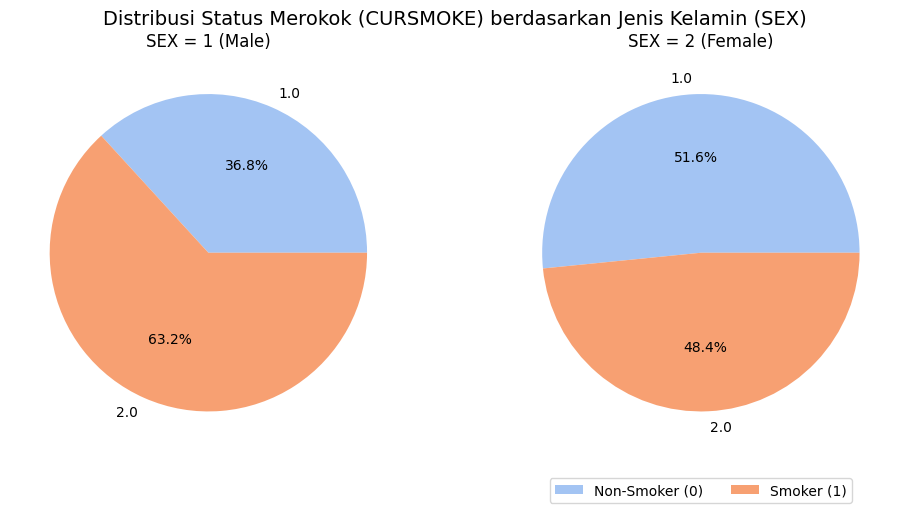

In [ ]:
import matplotlib.pyplot as plt

# Buat pie chart untuk CURSMOKE berdasarkan SEX
ax = df_imputed.groupby(['SEX', 'CURSMOKE']).size().unstack().plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 5),
    colors=['#a3c4f3', '#f7a072'],
    legend=False
)

# Mapping label SEX
sex_labels = {1: 'Male', 2: 'Female'}

# Tambahkan judul untuk masing-masing pie chart
for i, pie in enumerate(ax):
    sex_code = pie.get_title()  # ini mengambil angka 1 atau 2 (dari unstack)
    label = sex_labels.get(i + 1, f'SEX = {i + 1}')
    pie.set_title(f'SEX = {i + 1} ({label})')
    pie.set_ylabel('')  # hilangkan label Y

# Tambahkan legenda
plt.legend(labels=['Non-Smoker (0)', 'Smoker (1)'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Judul utama
plt.suptitle('Distribusi Status Merokok (CURSMOKE) berdasarkan Jenis Kelamin (SEX)', fontsize=14)

plt.tight_layout()
plt.show()


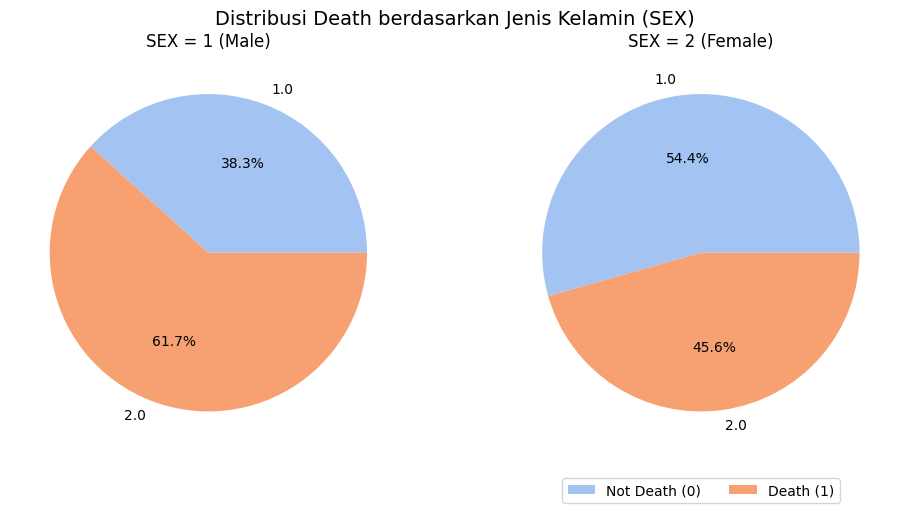

In [ ]:
import matplotlib.pyplot as plt

# Buat pie chart untuk CURSMOKE berdasarkan SEX
ax = df_imputed.groupby(['SEX', 'DEATH']).size().unstack().plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 5),
    colors=['#a3c4f3', '#f7a072'],
    legend=False
)

# Mapping label SEX
sex_labels = {1: 'Male', 2: 'Female'}

# Tambahkan judul untuk masing-masing pie chart
for i, pie in enumerate(ax):
    sex_code = pie.get_title()  # ini mengambil angka 1 atau 2 (dari unstack)
    label = sex_labels.get(i + 1, f'SEX = {i + 1}')
    pie.set_title(f'SEX = {i + 1} ({label})')
    pie.set_ylabel('')  # hilangkan label Y

# Tambahkan legenda
plt.legend(labels=['Not Death (0)', 'Death (1)'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Judul utama
plt.suptitle('Distribusi Death berdasarkan Jenis Kelamin (SEX)', fontsize=14)

plt.tight_layout()
plt.show()


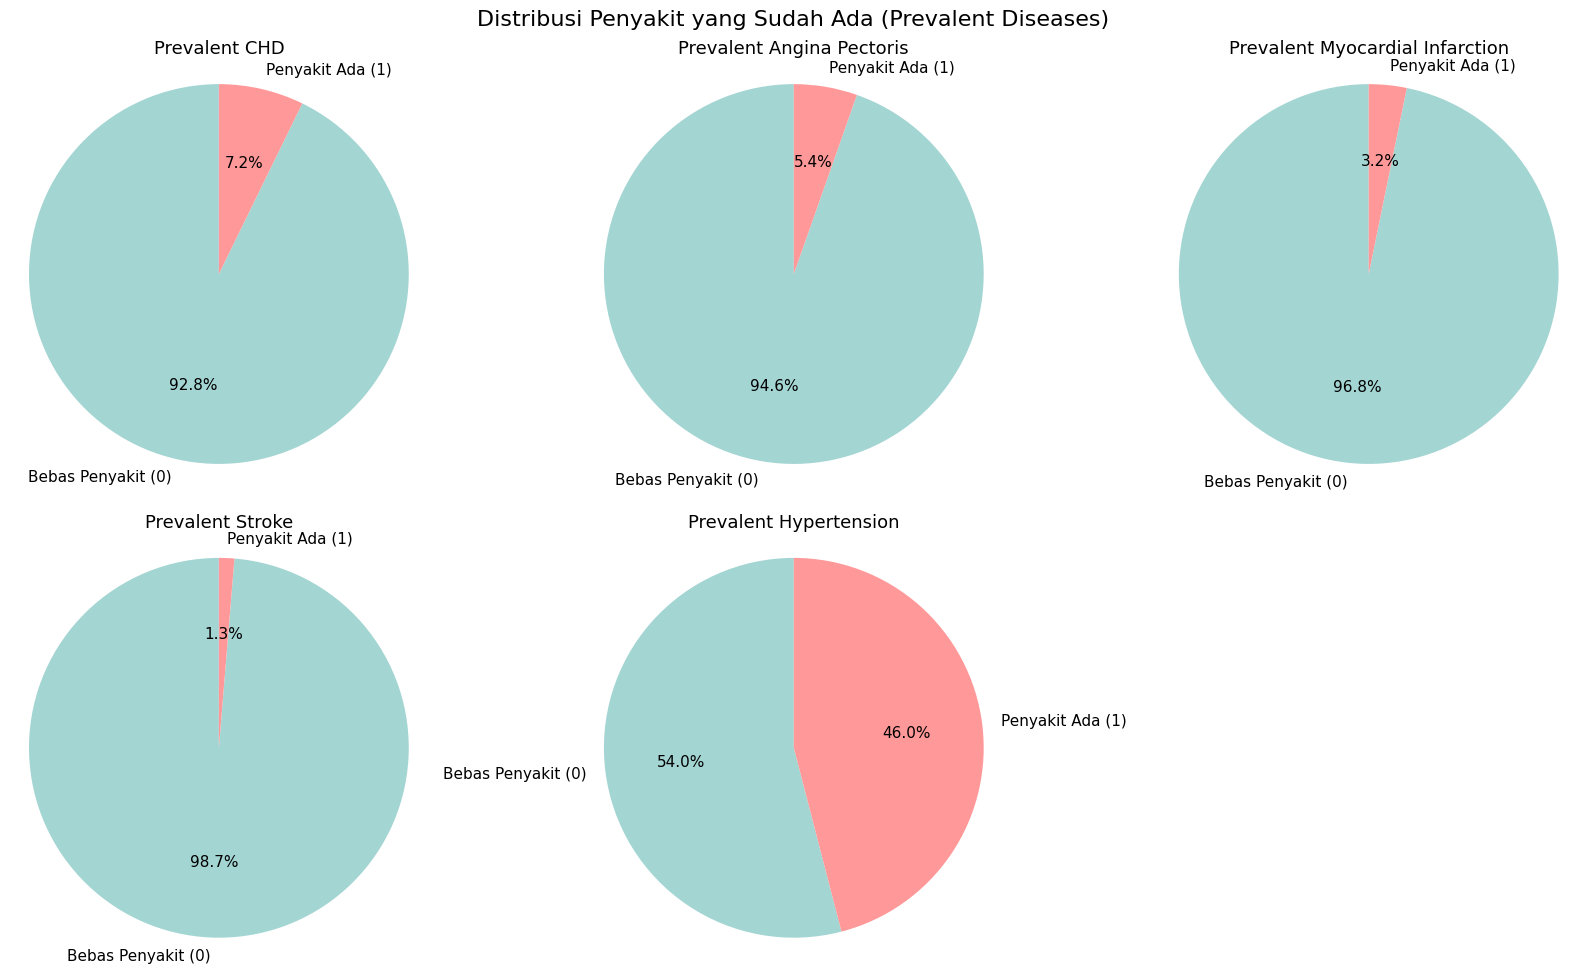

In [ ]:
import matplotlib.pyplot as plt

# Daftar variabel dan judul
variables = ['PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP']
titles = [
    'Prevalent CHD',
    'Prevalent Angina Pectoris',
    'Prevalent Myocardial Infarction',
    'Prevalent Stroke',
    'Prevalent Hypertension'
]

# Warna dan label
colors = ['#a3d5d3', '#ff9999']  # biru muda untuk sehat, merah muda untuk sakit
labels = ['Bebas Penyakit (0)', 'Penyakit Ada (1)']

# Setup grid 2x3 (dengan 1 subplot kosong)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()  # ubah jadi 1D array

# Plot setiap variabel
for i, var in enumerate(variables):
    counts = df_imputed[var].value_counts().sort_index()
    axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 11}
    )
    axes[i].set_title(titles[i], fontsize=13)
    axes[i].axis('equal')  # biar pie bulat

# Kosongkan subplot ke-6 jika tidak terpakai
if len(variables) < len(axes):
    axes[-1].axis('off')

# Judul utama
plt.suptitle('Distribusi Penyakit yang Sudah Ada (Prevalent Diseases)', fontsize=16)
plt.tight_layout()
plt.show()


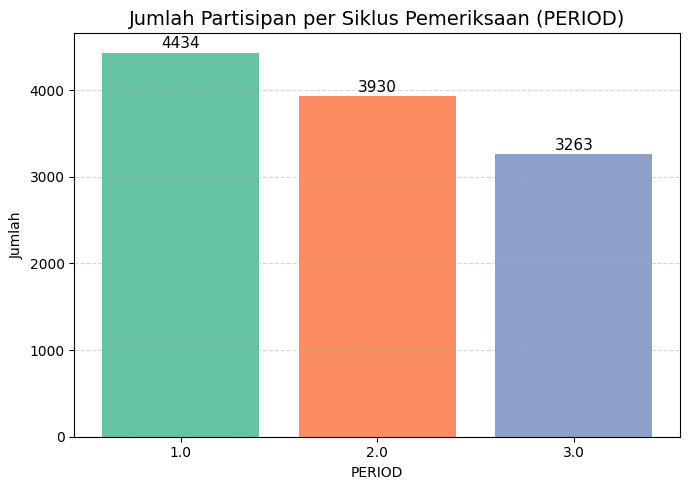

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing periode
period_counts = df_imputed['PERIOD'].value_counts().sort_index()

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(period_counts.index.astype(str), period_counts.values, color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Jumlah Partisipan per Siklus Pemeriksaan (PERIOD)', fontsize=14)
plt.xlabel('PERIOD')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan label jumlah di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{int(yval)}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


## distribusi variabel numerik

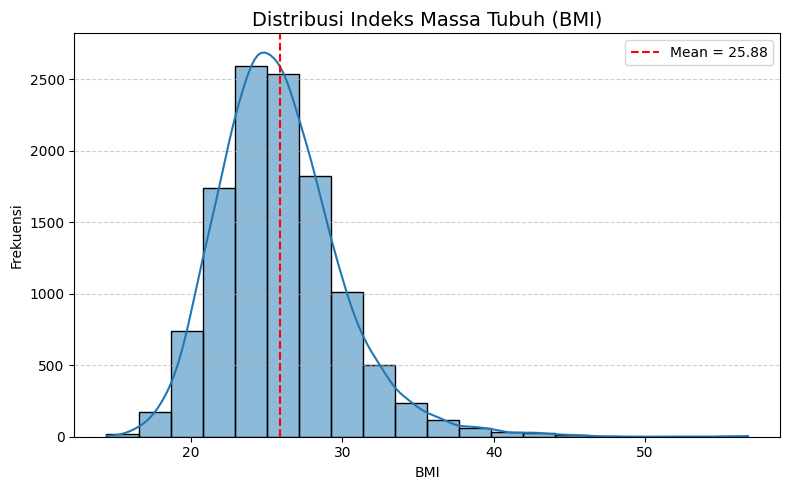

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_imputed['BMI'], bins=20, kde=True, color='#1f77b4')
plt.title('Distribusi Indeks Massa Tubuh (BMI)', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axvline(df_imputed['BMI'].mean(), color='red', linestyle='--', label=f'Mean = {df_imputed["BMI"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

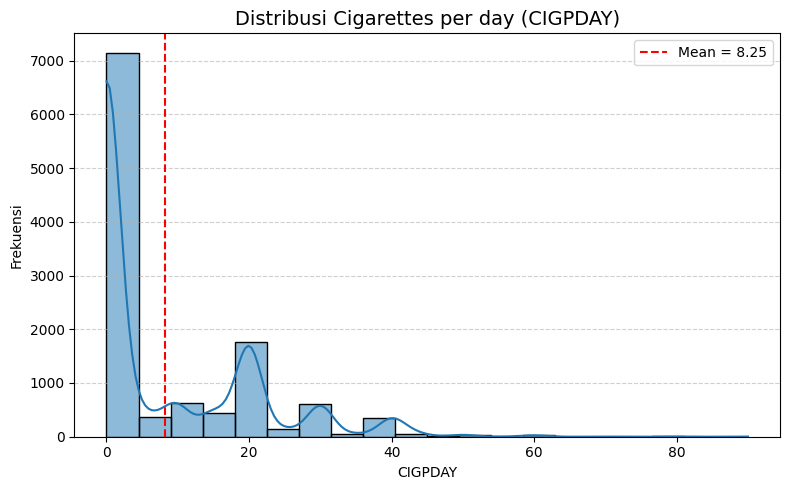

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_imputed['CIGPDAY'], bins=20, kde=True, color='#1f77b4')
plt.title('Distribusi Cigarettes per day (CIGPDAY)', fontsize=14)
plt.xlabel('CIGPDAY')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axvline(df_imputed['CIGPDAY'].mean(), color='red', linestyle='--', label=f'Mean = {df_imputed["CIGPDAY"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

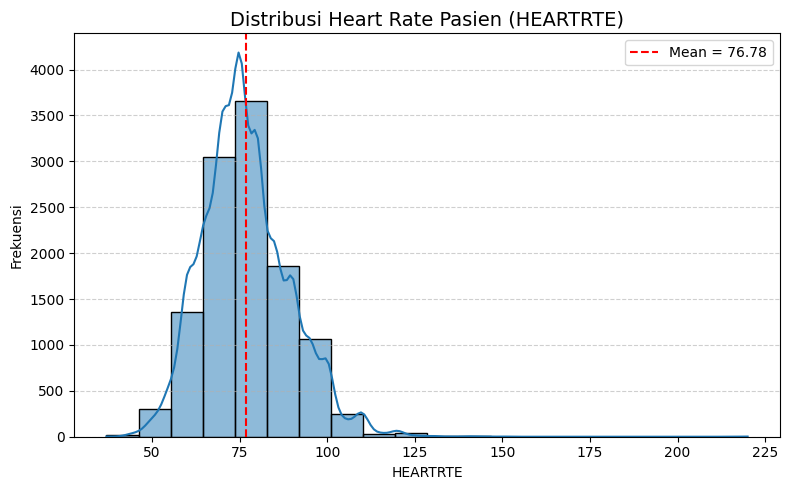

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_imputed['HEARTRTE'], bins=20, kde=True, color='#1f77b4')
plt.title('Distribusi Heart Rate Pasien (HEARTRTE)', fontsize=14)
plt.xlabel('HEARTRTE')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axvline(df_imputed['HEARTRTE'].mean(), color='red', linestyle='--', label=f'Mean = {df_imputed["HEARTRTE"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

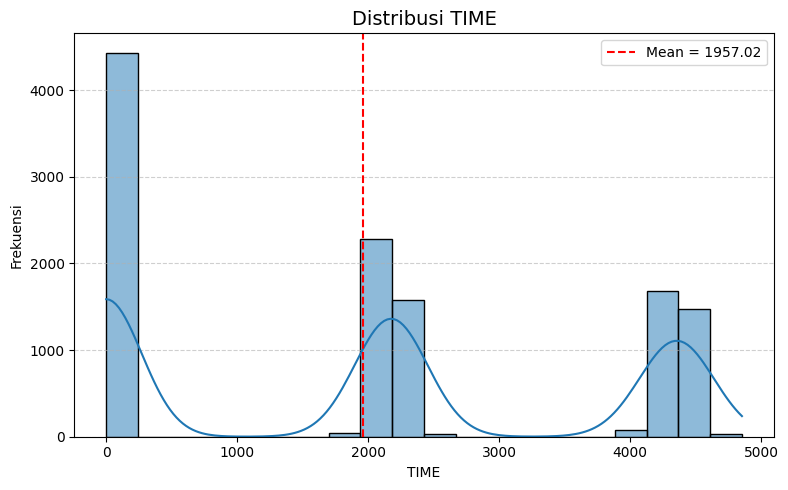

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_imputed['TIME'], bins=20, kde=True, color='#1f77b4')
plt.title('Distribusi TIME', fontsize=14)
plt.xlabel('TIME')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axvline(df_imputed['TIME'].mean(), color='red', linestyle='--', label=f'Mean = {df_imputed["TIME"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()


## HAPUS VARIABEL TIME

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  float64
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  float64
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  float64
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  float64
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11627 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  educ      11627 non-null  float64
 13  PREVCHD   11627 non-null  float64
 14  PREVAP    11627 non-null  float64
 15  PREVMI    11627 non-null  float64
 16  PREVSTRK  11627 non-null  float64
 17  PREVHYP   11627 non-null  float64
 18  TIME      11627 non-null  float64
 19  PERIOD    11627 non-null  float64
 20  ANGINA    11627 non-null  fl

In [ ]:
# hapus variabel time
X = X.drop(['TIME', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  float64
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  float64
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  float64
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  float64
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11627 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  educ      11627 non-null  float64
 13  PREVCHD   11627 non-null  float64
 14  PREVAP    11627 non-null  float64
 15  PREVMI    11627 non-null  float64
 16  PREVSTRK  11627 non-null  float64
 17  PREVHYP   11627 non-null  float64
 18  PERIOD    11627 non-null  float64
 19  ANGINA    11627 non-null  float64
 20  HOSPMI    11627 non-null  fl

# SMOTE (OVERSAMPLING)

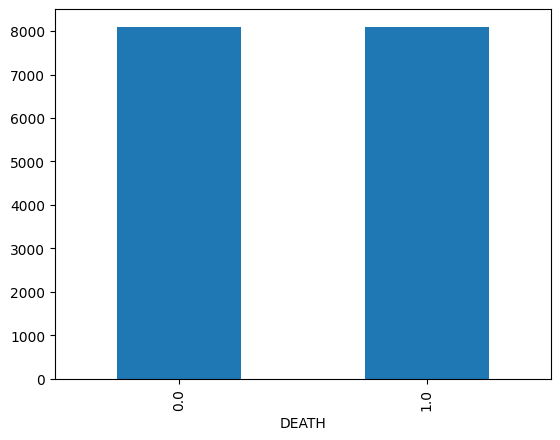

In [ ]:
#Using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

from sklearn.model_selection import train_test_split
X_train_smote,X_valid_smote,y_train_smote,y_valid_smote=train_test_split(X_ros,y_ros,test_size=0.2,random_state=0)

In [ ]:
X_train_smote_unscaled = X_train_smote.copy()
X_valid_smote_unscaled = X_valid_smote.copy()

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_smote=pd.DataFrame(sc.fit_transform(X_train_smote))
X_valid_smote=pd.DataFrame(sc.transform(X_valid_smote))
X_train_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.133166,-1.861366,0.622530,-0.367664,0.279494,-0.893499,-0.682247,0.703291,-0.256623,-0.347071,...,-0.152557,-1.025357,-1.117943,-0.500183,-0.408519,-0.549508,-0.732205,-0.392532,-0.720105,0.587253
1,-1.133166,-0.242854,2.315553,0.802028,0.868331,-0.893499,-0.682247,0.118472,-0.256623,-0.347071,...,-0.152557,1.019933,1.481123,-0.500183,-0.408519,-0.549508,-0.732205,-0.392532,-0.720105,0.587253
2,0.958993,-0.199111,-1.599563,0.593154,1.036570,1.161317,0.961312,-0.947815,-0.256623,-0.347071,...,-0.152557,1.019933,0.181590,-0.500183,-0.408519,-0.549508,-0.732205,-0.392532,-0.720105,0.587253
3,0.958993,0.019607,-1.493749,-1.119609,0.027135,-0.893499,-0.682247,-0.347871,-0.256623,-0.347071,...,-0.152557,-1.025357,0.181590,-0.500183,-0.408519,-0.549508,-0.732205,-0.392532,-0.720105,-1.811926
4,-1.133166,-1.245894,0.600307,-0.624162,-0.014088,1.161317,0.961312,-0.382963,-0.256623,-0.347071,...,-0.152557,-1.025357,-1.117943,-0.500183,-0.408519,-0.549508,-0.732205,-0.392532,-0.720105,-1.811926


In [ ]:
#Scaling removed column indexes here i reset them
X_train_smote.columns= X.columns
X_valid_smote.columns= X.columns

y_train_smote.index= X_train_smote.index
y_valid_smote.index= X_valid_smote.index

# UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Distribusi setelah Random Undersampling:", Counter(y_res))
from sklearn.model_selection import train_test_split
X_train_under,X_valid_under,y_train_under,y_valid_under=train_test_split(X_res,y_res,test_size=0.2,random_state=0)

Distribusi setelah Random Undersampling: Counter({0.0: 3527, 1.0: 3527})


In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_under=pd.DataFrame(sc.fit_transform(X_train_under))
X_valid_under=pd.DataFrame(sc.transform(X_valid_under))
X_train_under.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.930630,-0.906907,-0.422543,-0.580588,-0.299889,-0.879122,-0.685226,0.913344,-0.252415,-0.334922,...,-0.133631,-1.016979,1.392848,-0.475051,-0.38182,-0.515847,-0.697261,-0.363625,-0.681317,0.562137
1,-1.074541,-0.239833,-0.630064,-0.873115,-0.094137,1.137498,1.746857,-0.295326,-0.252415,-0.334922,...,-0.133631,-1.016979,0.154688,-0.475051,-0.38182,-0.515847,-0.697261,-0.363625,-0.681317,0.562137
2,0.930630,-0.411981,-1.252626,-1.792484,-2.028214,1.137498,0.125469,-0.513992,-0.252415,-0.334922,...,-0.133631,-1.016979,-1.083472,-0.475051,-0.38182,-0.515847,-0.697261,-0.363625,-0.681317,-1.778925
3,-1.074541,-0.089203,-0.526304,1.258151,1.346134,-0.879122,-0.685226,0.898926,-0.252415,-0.334922,...,-0.133631,0.983304,1.392848,-0.475051,-0.38182,-0.515847,-0.697261,-0.363625,-0.681317,0.562137
4,-1.074541,-0.562611,1.963943,0.004466,-1.287503,-0.879122,-0.685226,-0.379429,-0.252415,-0.334922,...,-0.133631,0.983304,1.392848,-0.475051,-0.38182,-0.515847,-0.697261,-0.363625,-0.681317,0.562137


In [ ]:
#Scaling removed column indexes here i reset them
X_train_under.columns= X.columns
X_valid_under.columns= X.columns

y_train_under.index= X_train_under.index
y_valid_under.index= X_valid_under.index

# SMOTETOMEK (OVER-UNDER SAMPLING)

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

print("Distribusi setelah SMOTETomek:", Counter(y_res))
from sklearn.model_selection import train_test_split
X_train_tomek,X_valid_tomek,y_train_tomek,y_valid_tomek=train_test_split(X_res,y_res,test_size=0.2,random_state=0)

Distribusi setelah SMOTETomek: Counter({0.0: 7863, 1.0: 7863})


In [ ]:
X_train_tomek.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,PREVSTRK,PREVHYP,PERIOD,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
6536,1.000000,223.000000,63.000000,145.000000,82.000000,1.0,20.0,27.560000,0.000000,0.000000,...,0.000000,1.0,2.00000,1.0,1.0,1.000000,1.0,0.0,1.0,1.0
14783,1.768980,220.306941,75.689802,137.310198,76.462040,0.0,0.0,28.853894,0.000000,0.000000,...,0.000000,1.0,2.76898,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4628,2.000000,290.000000,63.000000,148.000000,86.000000,0.0,0.0,24.990000,0.000000,0.000000,...,0.000000,1.0,3.00000,0.0,0.0,1.000000,1.0,0.0,1.0,1.0
6155,1.000000,248.000000,60.000000,161.000000,91.000000,1.0,10.0,19.290000,0.000000,1.000000,...,0.000000,1.0,3.00000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0
11332,1.562948,230.651989,69.311155,158.251794,98.251794,0.0,0.0,24.342981,0.437052,0.562948,...,0.562948,1.0,3.00000,0.0,0.0,0.562948,1.0,1.0,1.0,1.0


In [ ]:
X_train_tomek_unscaled = X_train_tomek.copy()
X_valid_tomek_unscaled = X_valid_tomek.copy()

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_tomek=pd.DataFrame(sc.fit_transform(X_train_tomek_unscaled))
X_valid_tomek=pd.DataFrame(sc.transform(X_valid_tomek_unscaled))
X_train_tomek.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.124113,-0.415828,0.728848,0.271637,-0.140018,1.157595,0.960103,0.406071,-0.253902,-0.348651,...,-0.152551,1.017997,0.161211,2.218420,2.792274,2.061576,1.506594,-0.393523,1.526258,0.578426
1,0.480381,-0.474676,2.059249,-0.056643,-0.610993,-0.892705,-0.685837,0.734454,-0.253902,-0.348651,...,-0.152551,1.017997,1.155779,-0.505314,-0.414505,-0.554204,-0.736941,-0.393523,-0.727538,0.578426
2,0.962409,1.048241,0.728848,0.399708,0.200162,-0.892705,-0.685837,-0.246180,-0.253902,-0.348651,...,-0.152551,1.017997,1.454571,-0.505314,-0.414505,2.061576,1.506594,-0.393523,1.526258,0.578426
3,-1.124113,0.130467,0.414327,0.954683,0.625387,1.157595,0.137133,-1.692808,-0.253902,3.279843,...,-0.152551,1.017997,1.454571,-0.505314,-0.414505,-0.554204,-0.736941,2.909303,1.526258,0.578426
4,0.050491,-0.248618,1.390511,0.837361,1.242116,-0.892705,-0.685837,-0.410390,1.746829,1.694004,...,4.304004,1.017997,1.454571,-0.505314,-0.414505,0.918345,1.506594,2.909303,1.526258,0.578426


In [ ]:
#Scaling removed column indexes here i reset them
X_train_tomek.columns= X.columns
X_valid_tomek.columns= X.columns

y_train_tomek.index= X_train_tomek.index
y_valid_tomek.index= X_valid_tomek.index

# FUNGSI CONFUSION MATRIX

In [ ]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix # Added confusion_matrix here
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# SVM MODEL

## MODEL SMOTE

Support Vector Machine Accuracy Score:  0.842283950617284
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1618
         1.0       0.89      0.78      0.83      1622

    accuracy                           0.84      3240
   macro avg       0.85      0.84      0.84      3240
weighted avg       0.85      0.84      0.84      3240



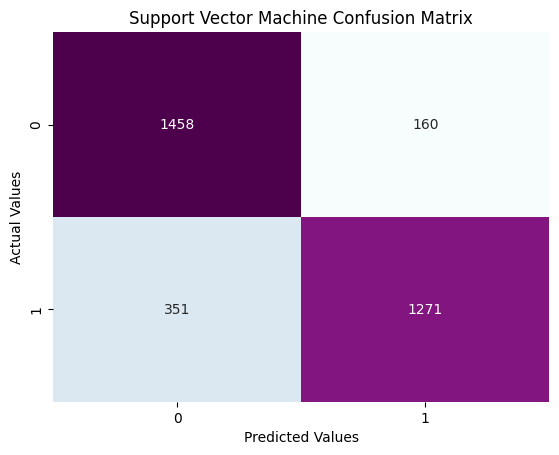

In [ ]:
#Using Support Vector Machine
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score # Import accuracy_score here
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_smote, y_train_smote)
y_pred_svc= svc.predict(X_valid_smote)
print('Support Vector Machine Accuracy Score: ',accuracy_score(y_valid_smote, y_pred_svc))
cm_svc=my_confusion_matrix(y_valid_smote, y_pred_svc, 'Support Vector Machine Confusion Matrix')

## MODEL UNDERSAMPLING SVM

Support Vector Machine Accuracy Score:  0.7675407512402551
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       690
         1.0       0.80      0.73      0.76       721

    accuracy                           0.77      1411
   macro avg       0.77      0.77      0.77      1411
weighted avg       0.77      0.77      0.77      1411



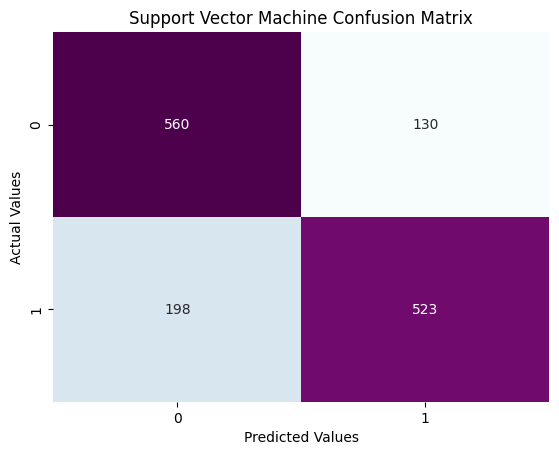

In [ ]:
#Using Support Vector Machine
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score # Import accuracy_score here
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_under, y_train_under)
y_pred_svc= svc.predict(X_valid_under)
print('Support Vector Machine Accuracy Score: ',accuracy_score(y_valid_under, y_pred_svc))
cm_svc=my_confusion_matrix(y_valid_under, y_pred_svc, 'Support Vector Machine Confusion Matrix')

## MODEL SMOTETOMEK SVM

Support Vector Machine Accuracy Score:  0.8502860775588048
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1518
         1.0       0.90      0.80      0.85      1628

    accuracy                           0.85      3146
   macro avg       0.85      0.85      0.85      3146
weighted avg       0.85      0.85      0.85      3146



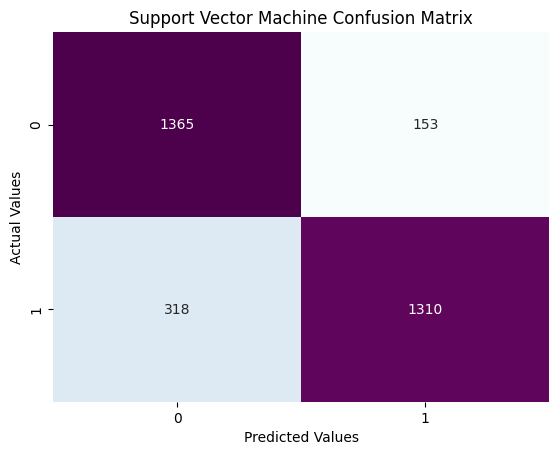

In [ ]:
#Using Support Vector Machine
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score # Import accuracy_score here
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_tomek, y_train_tomek)
y_pred_svc= svc.predict(X_valid_tomek)
print('Support Vector Machine Accuracy Score: ',accuracy_score(y_valid_tomek, y_pred_svc))
cm_svc=my_confusion_matrix(y_valid_tomek, y_pred_svc, 'Support Vector Machine Confusion Matrix')

# MODEL DECISION TREE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': randint(10, 100),
    'max_features': randint(1, X_train_tomek_unscaled.shape[1]),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=0,
    verbose=1
)

random_search.fit(X_train_tomek_unscaled, y_train_tomek)
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 10, 'max_features': 18, 'min_samples_leaf': 3, 'min_samples_split': 6}


Decision Tree Classifier Accuracy Score: 0.8223140495867769
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.83      1518
         1.0       0.87      0.77      0.82      1628

    accuracy                           0.82      3146
   macro avg       0.83      0.82      0.82      3146
weighted avg       0.83      0.82      0.82      3146



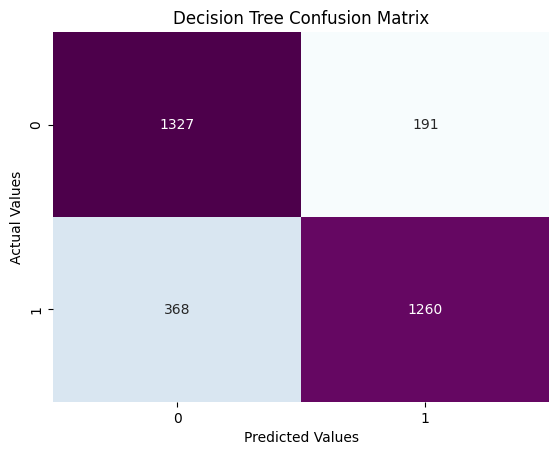

In [ ]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns # Import seaborn

# Inisialisasi model Decision Tree
dtc = DecisionTreeClassifier(
    max_depth=10,
    max_features=18,
    min_samples_leaf=3,
    min_samples_split=6,
    random_state=0
)

# Melatih model
dtc.fit(X_train_tomek_unscaled, y_train_tomek)

# Prediksi pada data validasi
y_pred_dtc = dtc.predict(X_valid_tomek_unscaled)

# Evaluasi
print('Decision Tree Classifier Accuracy Score:', accuracy_score(y_valid_tomek, y_pred_dtc))

# Confusion Matrix (menggunakan fungsi Anda sendiri)
cm_dtc = my_confusion_matrix(y_valid_tomek, y_pred_dtc, 'Decision Tree Confusion Matrix')

# SMOTETOMEK NN

In [ ]:
pip install scikeras

In [ ]:
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tomek.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Adding an early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=25,  #Stop the model training if the accuracy doesnt increase in 25 Epochs
                   restore_best_weights=True)

NN_Classifier = model.fit(X_train_tomek, y_train_tomek,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=2,
                    validation_data=(X_valid_tomek, y_valid_tomek))

Epoch 1/1000
126/126 - 10s - 75ms/step - accuracy: 0.7665 - loss: 0.4897 - val_accuracy: 0.7756 - val_loss: 0.4657
Epoch 2/1000
126/126 - 3s - 28ms/step - accuracy: 0.7979 - loss: 0.4432 - val_accuracy: 0.7880 - val_loss: 0.4469
Epoch 3/1000
126/126 - 3s - 25ms/step - accuracy: 0.8060 - loss: 0.4252 - val_accuracy: 0.7886 - val_loss: 0.4494
Epoch 4/1000
126/126 - 3s - 27ms/step - accuracy: 0.8125 - loss: 0.4130 - val_accuracy: 0.7953 - val_loss: 0.4317
Epoch 5/1000
126/126 - 3s - 26ms/step - accuracy: 0.8221 - loss: 0.3966 - val_accuracy: 0.7997 - val_loss: 0.4223
Epoch 6/1000
126/126 - 6s - 49ms/step - accuracy: 0.8251 - loss: 0.3911 - val_accuracy: 0.8099 - val_loss: 0.4061
Epoch 7/1000
126/126 - 4s - 32ms/step - accuracy: 0.8277 - loss: 0.3804 - val_accuracy: 0.8163 - val_loss: 0.4021
Epoch 8/1000
126/126 - 5s - 39ms/step - accuracy: 0.8351 - loss: 0.3676 - val_accuracy: 0.8185 - val_loss: 0.3980
Epoch 9/1000
126/126 - 4s - 33ms/step - accuracy: 0.8374 - loss: 0.3609 - val_accuracy:

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Networks Accuracy Score:  0.8871582962492054
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1518
         1.0       0.88      0.91      0.89      1628

    accuracy                           0.89      3146
   macro avg       0.89      0.89      0.89      3146
weighted avg       0.89      0.89      0.89      3146



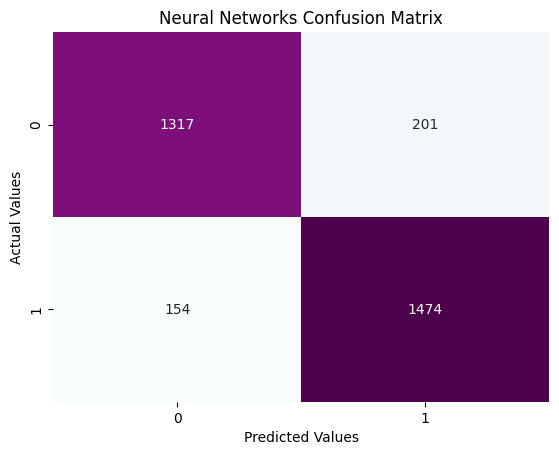

array([[1317,  201],
       [ 154, 1474]])

In [ ]:
y_pred_NN=(model.predict(X_valid_tomek) > 0.5).astype(int)
print('Neural Networks Accuracy Score: ',accuracy_score(y_valid_tomek, y_pred_NN))
my_confusion_matrix(y_valid_tomek, y_pred_NN, 'Neural Networks Confusion Matrix')

# MODEL EVALUATION

In [ ]:
# Model Evaluation SVM
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Buat Pipeline: langkah pertama adalah scaling, langkah kedua adalah model SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10))
])

# Perform K-Fold Cross Validation with 5 folds
X_SVM = X_res.values
y_SVM = y_res.values

# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_accuracy = cross_val_score(pipeline_svc, X_SVM , y_SVM, cv=skf, scoring='accuracy')
cv_scores_precision = cross_val_score(pipeline_svc, X_SVM, y_SVM, cv=skf, scoring='precision')
cv_scores_recall = cross_val_score(pipeline_svc, X_SVM, y_SVM, cv=skf, scoring='recall')
cv_scores_f1 = cross_val_score(pipeline_svc, X_SVM, y_SVM, cv=skf, scoring='f1')

# Print the results
print("Stratified K-Fold Cross Validation Results (SMOTETomek with SVC):")
print("Accuracy (per fold):", cv_scores_accuracy)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_accuracy.mean(), cv_scores_accuracy.std() * 2))
print("\nPrecision (per fold):", cv_scores_precision)
print("Precision: %0.2f (+/- %0.2f)" % (cv_scores_precision.mean(), cv_scores_precision.std() * 2))
print("\nRecall (per fold):", cv_scores_recall)
print("Recall: %0.2f (+/- %0.2f)" % (cv_scores_recall.mean(), cv_scores_recall.std() * 2))
print("\nF1-Score (per fold):", cv_scores_f1)
print("F1-Score: %0.2f (+/- %0.2f)" % (cv_scores_f1.mean(), cv_scores_f1.std() * 2))

Stratified K-Fold Cross Validation Results (SMOTETomek with SVC):
Accuracy (per fold): [0.85505404 0.84356121 0.85437202 0.85437202 0.85055644]
Accuracy: 0.85 (+/- 0.01)

Precision (per fold): [0.89807555 0.88961039 0.89115169 0.89510985 0.8800827 ]
Precision: 0.89 (+/- 0.01)

Recall (per fold): [0.80101716 0.78435115 0.80725191 0.80292435 0.81182454]
Recall: 0.80 (+/- 0.02)

F1-Score (per fold): [0.84677419 0.8336714  0.84712951 0.84651475 0.84457672]
F1-Score: 0.84 (+/- 0.01)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Buat pipeline: scaling + SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10, random_state=42))
])

# Stratified K-Fold agar distribusi label tetap seimbang
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi dengan cross-validation
cv_accuracy = cross_val_score(pipeline_svc, X_res, y_res, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(pipeline_svc, X_res, y_res, cv=skf, scoring='precision')
cv_recall = cross_val_score(pipeline_svc, X_res, y_res, cv=skf, scoring='recall')
cv_f1 = cross_val_score(pipeline_svc, X_res, y_res, cv=skf, scoring='f1')

# Print hasilnya
print("K-Fold Cross Validation Results (SMOTETomek + Pipeline SVC):")
print(f"Accuracy: {cv_accuracy.mean():.2f} (+/- {cv_accuracy.std() * 2:.2f})")
print(f"Precision: {cv_precision.mean():.2f} (+/- {cv_precision.std() * 2:.2f})")
print(f"Recall: {cv_recall.mean():.2f} (+/- {cv_recall.std() * 2:.2f})")
print(f"F1 Score: {cv_f1.mean():.2f} (+/- {cv_f1.std() * 2:.2f})")

K-Fold Cross Validation Results (SMOTETomek + Pipeline SVC):
Accuracy: 0.85 (+/- 0.01)
Precision: 0.89 (+/- 0.01)
Recall: 0.80 (+/- 0.02)
F1 Score: 0.84 (+/- 0.01)


In [ ]:
# Model Evaluation Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Perform K-Fold Cross Validation with 5 folds
cv_scores_accuracy = cross_val_score(dtc, X_res, y_res, cv=skf, scoring='accuracy')
cv_scores_precision = cross_val_score(dtc, X_res, y_res, cv=skf, scoring='precision')
cv_scores_recall = cross_val_score(dtc, X_res, y_res, cv=skf, scoring='recall')
cv_scores_f1 = cross_val_score(dtc, X_res, y_res, cv=skf, scoring='f1')

# Print the results
print("Stratified K-Fold Cross Validation Results (SMOTETomek with Decision Tree):")
print("Accuracy (per fold):", cv_scores_accuracy)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_accuracy.mean(), cv_scores_accuracy.std() * 2))
print("\nPrecision (per fold):", cv_scores_precision)
print("Precision: %0.2f (+/- %0.2f)" % (cv_scores_precision.mean(), cv_scores_precision.std() * 2))
print("\nRecall (per fold):", cv_scores_recall)
print("Recall: %0.2f (+/- %0.2f)" % (cv_scores_recall.mean(), cv_scores_recall.std() * 2))
print("\nF1-Score (per fold):", cv_scores_f1)
print("F1-Score: %0.2f (+/- %0.2f)" % (cv_scores_f1.mean(), cv_scores_f1.std() * 2))

Stratified K-Fold Cross Validation Results (SMOTETomek with Decision Tree):
Accuracy (per fold): [0.83439288 0.82829889 0.82861685 0.81939587 0.82130366]
Accuracy: 0.83 (+/- 0.01)

Precision (per fold): [0.87252125 0.86083916 0.87783467 0.87249815 0.85177453]
Precision: 0.87 (+/- 0.02)

Recall (per fold): [0.78321678 0.78307888 0.76335878 0.74825175 0.77813096]
Recall: 0.77 (+/- 0.03)

F1-Score (per fold): [0.82546064 0.82011992 0.81660429 0.80561259 0.81328904]
F1-Score: 0.82 (+/- 0.01)


In [ ]:
# Model Evaluation Neural Network (Manual Cross-Validation)
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np # Import numpy

# Definisikan fungsi untuk membuat model Keras
def build_nn_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_res.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

X_cv = X_res.values
y_cv = y_res.values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("Performing manual Stratified K-Fold Cross Validation (SMOTETomek with Neural Network)...")
for fold, (train_index, test_index) in enumerate(skf.split(X_cv, y_cv)):
    print(f"--- Fold {fold+1}/5 ---")

    X_train, X_test = X_cv[train_index], X_cv[test_index]
    y_train, y_test = y_cv[train_index], y_cv[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = build_nn_model()
    es = EarlyStopping(monitor='val_accuracy',
                       mode='max',
                       patience=25,
                       restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                        batch_size=100,
                        epochs=1000,
                        callbacks =[es],
                        verbose=0,
                        validation_data=(X_test_scaled, y_test))

    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_precision = precision_score(y_test, y_pred)
    fold_recall = recall_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(fold_accuracy)
    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)
    f1_scores.append(fold_f1)

    print(f"Fold {fold+1} - Accuracy: {fold_accuracy:.4f}, Precision: {fold_precision:.4f}, Recall: {fold_recall:.4f}, F1-Score: {fold_f1:.4f}")


mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)


print("\nHasil Rata-rata K-Fold Cross Validation (SMOTETomek with Neural Network):")
print("Accuracy: %0.2f (+/- %0.2f)" % (mean_accuracy, std_accuracy * 2))
print("Precision: %0.2f (+/- %0.2f)" % (mean_precision, std_precision * 2))
print("Recall: %0.2f (+/- %0.2f)" % (mean_recall, std_recall * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (mean_f1, std_f1 * 2))

Performing manual Stratified K-Fold Cross Validation (SMOTETomek with Neural Network)...
--- Fold 1/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 1 - Accuracy: 0.8894, Precision: 0.8807, Recall: 0.9008, F1-Score: 0.8906
--- Fold 2/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Fold 2 - Accuracy: 0.8897, Precision: 0.8869, Recall: 0.8931, F1-Score: 0.8900
--- Fold 3/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 3 - Accuracy: 0.8814, Precision: 0.8802, Recall: 0.8830, F1-Score: 0.8815
--- Fold 4/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Fold 4 - Accuracy: 0.8833, Precision: 0.8755, Recall: 0.8938, F1-Score: 0.8846
--- Fold 5/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 5 - Accuracy: 0.8795, Precision: 0.8708, Recall: 0.8913, F1-Score: 0.8809

Hasil Rata-rata K-Fold Cross Validation (SMOTETomek with Neural Network):
Accuracy: 0.88 (+/- 0.01)
Precision: 0.88 (+/- 0.01)
Recall: 0.89 (+/- 0.01)
F1-Score: 0.89 (+/- 0.01)


## Feature Importance

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/tmp/ipython-input-61-3913364721.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


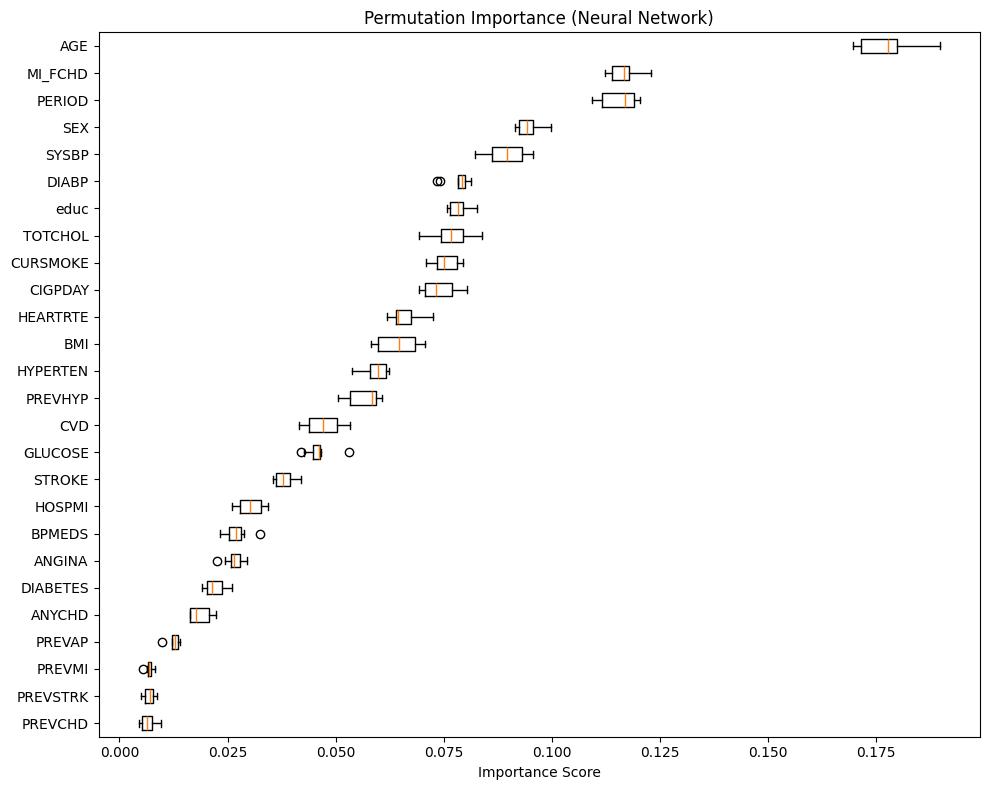

In [ ]:
from sklearn.inspection import permutation_importance

def keras_accuracy_scorer(estimator, X, y_true):
    y_pred_proba = estimator.predict(X)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return accuracy_score(y_true, y_pred)

result = permutation_importance(
    model,
    X_valid_tomek,
    y_valid_tomek,
    scoring=keras_accuracy_scorer,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)


sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_valid_tomek.columns[sorted_idx],
)
plt.title("Permutation Importance (Neural Network)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

---

# MODEL SURVIVAL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mno

In [ ]:
data_survive = df_imputed.copy()
data_survive.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.735,0.0,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,2.0,260.0,52.0,105.0,69.5,0.0,0.0,29.430,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,2.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0


In [ ]:
data_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  float64
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  float64
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  float64
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  float64
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11627 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  educ      11627 non-null  float64
 13  PREVCHD   11627 non-null  float64
 14  PREVAP    11627 non-null  float64
 15  PREVMI    11627 non-null  float64
 16  PREVSTRK  11627 non-null  float64
 17  PREVHYP   11627 non-null  float64
 18  TIME      11627 non-null  float64
 19  PERIOD    11627 non-null  float64
 20  DEATH     11627 non-null  fl

In [ ]:
# drop variabel time, timeap, timemi, timemifc, timechd, timestrk, timecvd, timehyp
data_survive.drop(['TIME', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP'], axis=1, inplace=True)
data_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  float64
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  float64
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  float64
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  float64
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11627 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  educ      11627 non-null  float64
 13  PREVCHD   11627 non-null  float64
 14  PREVAP    11627 non-null  float64
 15  PREVMI    11627 non-null  float64
 16  PREVSTRK  11627 non-null  float64
 17  PREVHYP   11627 non-null  float64
 18  PERIOD    11627 non-null  float64
 19  DEATH     11627 non-null  float64
 20  ANGINA    11627 non-null  fl

In [ ]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


In [ ]:
from sksurv.tree import SurvivalTree
from sksurv.util import Surv
import pandas as pd

In [ ]:
y = Surv.from_dataframe('DEATH', 'TIMEDTH', data_survive)
X = data_survive.drop(columns=['DEATH', 'TIMEDTH']).copy()

In [ ]:
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X, y)

RandomSurvivalForest(random_state=42)

In [ ]:
df = data_survive.copy()

In [ ]:
# Evaluasi model
from sksurv.metrics import concordance_index_censored
c_index = concordance_index_censored(y['DEATH'], y['TIMEDTH'], rsf.predict(X))
print("C-index:", c_index[0])

C-index: 0.9289595452880987


In [ ]:
# Prediksi Risk Score
risk_scores = rsf.predict(X)
print("Predicted time for first 10 customers:", risk_scores[:10])

Predicted time for first 10 customers: [188.18573883 144.11382468 129.81037124  60.4130527   52.9313
 131.15955078 221.90151407 786.68270873 892.21298268  63.49635109]


In [ ]:
# Prediksi fungsi survival untuk semua observasi
pred_surv_funcs = rsf.predict_survival_function(X)

# Hitung median survival time (t saat S(t) <= 0.5)
def get_median_survival_time(surv_fn):
    times = surv_fn.x
    probs = surv_fn.y
    below_half = probs <= 0.5
    if any(below_half):
        return times[below_half.argmax()]
    else:
        return np.inf  # jika survival tak pernah turun di bawah 0.5

T_pred_rsf = [get_median_survival_time(f) for f in pred_surv_funcs]
df["T_pred_rsf"] = T_pred_rsf

In [ ]:
# Hitung yang infinite
infinite_count = df[df["T_pred_rsf"] == np.inf].shape[0]
print(f"Jumlah observasi dengan median survival time tak terhingga: {infinite_count}")

# Hitung yang infinite dan status yes
infinite_status_count = df[(df["T_pred_rsf"] == np.inf) & (df["DEATH"] == True)].shape[0]
print(f"Jumlah observasi dengan median survival time tak terhingga dan observed: {infinite_status_count}")

# Hitung semua observasi yang status yes
total_status_count = df[df["DEATH"] == True].shape[0]
print(f"Jumlah observasi yang observed: {total_status_count}")

# Hitung proporsi observasi dengan median survival time tak terhingga yang juga status yes
if total_status_count > 0:
    prop_infinite_status = infinite_status_count / total_status_count
print(f"Proporsi observasi dengan median survival time tak terhingga yang juga observed: {prop_infinite_status:.2%}")

Jumlah observasi dengan median survival time tak terhingga: 8733
Jumlah observasi dengan median survival time tak terhingga dan observed: 784
Jumlah observasi yang observed: 3527
Proporsi observasi dengan median survival time tak terhingga yang juga observed: 22.23%


In [ ]:
# Evaluasi model dengan MSE (hanya bisa digunakan pada data Observed)
from sklearn.metrics import mean_squared_error
y_observed = y[(y['DEATH'] == True) & (df['T_pred_rsf'] != np.inf)]
predicted_time = df[(df['DEATH'] == True) & (df['T_pred_rsf'] != np.inf)]['T_pred_rsf']

mse = mean_squared_error(y_observed['TIMEDTH'], predicted_time)
print("Mean Squared Error (MSE) for Observed:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Observed:", rmse)

Mean Squared Error (MSE) for Observed: 3301690.6427269415
Root Mean Squared Error (RMSE) for Observed: 1817.0554869697683
